# Synthèse des Images
# TP 1 : Courbes de Bézier
## Matéo Gatel, UPSSITECH 2A SRI, Groupe 2

In [1]:
import matplotlib.pyplot as plt

Dans un premier temps, j'ai créé une fonction permettant de récupérer le triangle de Pascal.

In [2]:
def trianglePascal (n):
    lp = [1]
    for j in range(n):
        nl = lp + [1]
        for i in range(len(lp) - 1):
            nl[i+1] = lp[i] + lp[i+1]
        lp = nl
    return lp

trianglePascal(5)

[1, 5, 10, 10, 5, 1]

Pour simplifier le développement, j'ai scindé les parties de code. Ici il n'y a que le calcul des polynomes de Bernstein

In [3]:
def Bernstein(nbPoints, u):
    pascal = trianglePascal(nbPoints-1)
    Bi = [0] * nbPoints
    for j in range(nbPoints):
        Bi[j] = pascal[j] * pow(u, j) * pow((1-u), (nbPoints-j-1))
    return Bi

Puisque les polynomes sont décrit dans des fichiers (dans le dossier DATA), cette fonction permet de lire les points et de les compter

In [4]:
def loadPoints(path):
    i = 0
    with open(path, "r") as f:
        points = list()
        for line in f:
            i = i+1
            if "#" in line:
                # on saute la ligne
                continue
            data = line.split()
            points.append((float(data[0]), float(data[1])))
    nbPoints = i
    return nbPoints, points

Cette fonction permet d'afficher sur la même figure le polygone de contrôle, de référence avec les points de son fichier ainsi que le résultat des courbes de Bézier

In [5]:
def afficher(path, beziers):
    nbPoints, points = loadPoints(path)
    Xp = []
    Yp = []
    Xb = []
    Yb = []
    for i in range(len(points)):
        Xp.append(points[i][0])
        Yp.append(points[i][1])

    for j in range(len(beziers)):
        Xb.append(beziers[j][0])
        Yb.append(beziers[j][1])

    plt.plot(Xp, Yp)
    plt.plot(Xb, Yb)
    plt.show()

Implémentation des courbes de Bézier avec le triangle de Pascal et les polynomes de Bernstein

In [6]:
def Bezier(points, nbPoints, nbBezier=100):
    beziers = list()
    for u2 in range(0, nbBezier+1, 1):
        u = u2/nbBezier
        bern = Bernstein(nbPoints, u)
        x = 0
        y = 0
        for i in range(nbPoints):
            x = x + bern[i] * points[i][0]
            y = y + bern[i] * points[i][1]
        beziers.append((x, y))
    return beziers

Implémentation de Bézier par morceau. On découpe les points du polynome de contrôle et on assemble les courbes de Bézier entre elles

In [7]:
def BezierParMorceau(points, nbBezier):
    morceaux = list(list())
    beziers = list()
    sousmorceau = list()
    nbElemSousMorceau = 0
    for point in points:
        sousmorceau.append(point)
        nbElemSousMorceau += 1
        if nbElemSousMorceau == 4:
            morceaux.append(sousmorceau)
            sousmorceau = list()
            sousmorceau.append(point)
            nbElemSousMorceau = 1
    morceaux.append(sousmorceau)
    for morceau in morceaux:
        for ptBeziers in Bezier(morceau, len(morceau), nbBezier):
            beziers.append(ptBeziers)
    return beziers


Tests de Bézier sur des courbes simples (4 et 6 points de contrôle)

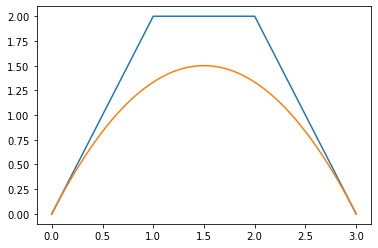

(4, [(0.0, 0.0), (1.0, 2.0), (2.0, 2.0), (3.0, 0.0)])


In [8]:
path = "../DATA/4pts.txt"
nbBezier = 100
nbPoints, points = loadPoints(path)
beziers = Bezier(points, nbPoints, nbBezier)
afficher(path, beziers)
print (loadPoints("../DATA/4pts.txt"))

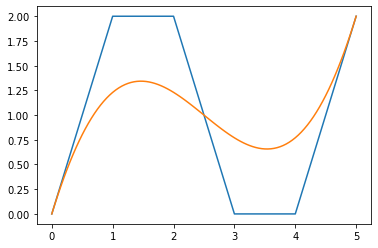

(6, [(0.0, 0.0), (1.0, 2.0), (2.0, 2.0), (3.0, 0.0), (4.0, 0.0), (5.0, 2.0)])


In [9]:
path = "../DATA/6pts.txt"
nbBezier = 100
nbPoints, points = loadPoints(path)
beziers = Bezier(points, nbPoints, nbBezier)
afficher(path, beziers)
print (loadPoints("../DATA/6pts.txt"))

Test sur un exemple avec tracé complexe incluant une boucle et 16 points de contrôle.

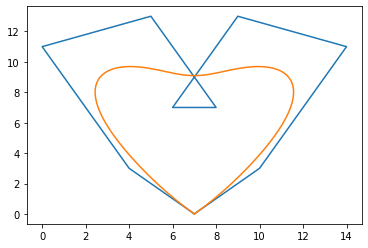

(6, [(0.0, 0.0), (1.0, 2.0), (2.0, 2.0), (3.0, 0.0), (4.0, 0.0), (5.0, 2.0)])


In [10]:
path = "../DATA/coeur.txt"
nbBezier = 100
nbPoints, points = loadPoints(path)
beziers = Bezier(points, nbPoints, nbBezier)
afficher(path, beziers)
print (loadPoints("../DATA/6pts.txt"))

Même tracé mais avec des Béziers cubiques par morceau. Continuité de raccord "à la main".

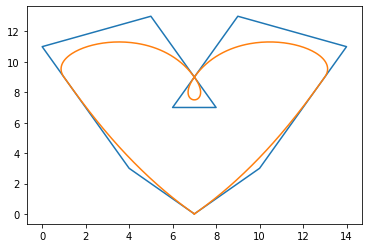

In [11]:
path = "../DATA/coeur.txt"
nbBezier = 100
nbPoints, points = loadPoints(path)
beziers = BezierParMorceau(points, nbBezier)
afficher(path, beziers)

Expérimentation libre sur d'autres tracés de courbes complexes, par morceau (ouverte, fermée, boucle)

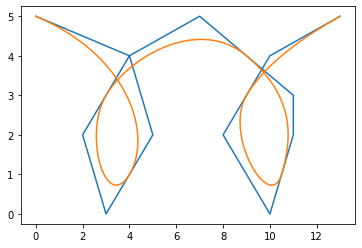

In [12]:
path = "../DATA/tournicoti.txt"
nbBezier = 100
nbPoints, points = loadPoints(path)
beziers = BezierParMorceau(points, nbBezier)
afficher(path, beziers)

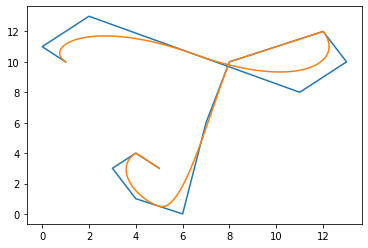

In [13]:
path = "../DATA/s.txt"
nbBezier = 100
nbPoints, points = loadPoints(path)
beziers = BezierParMorceau(points, nbBezier)
afficher(path, beziers)

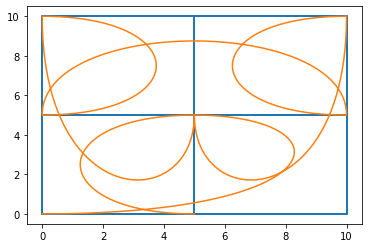

In [14]:
path = "../DATA/droleDeCaree.txt"
nbBezier = 100
nbPoints, points = loadPoints(path)
beziers = BezierParMorceau(points, nbBezier)
afficher(path, beziers)